![Logo-FIUBA](https://cms.fi.uba.ar/uploads/logo_0e621ee7ba.png)

# <u>Trabajo individual / Coloquio integrador<u>

- Pascual Osorio, Juan Manuel
- Fecha de exámen: 11/02/2022
- Padrón: 105916

In [45]:
#-------------------------------------------------------------------------------------------------------------------------#

## Ejercicios a resolver:
![Consignas](https://cdn.discordapp.com/attachments/901276566741463040/941024120898994238/unknown.png)

In [46]:
#-------------------------------------------------------------------------------------------------------------------------#

#### Importo los módulos a utilizar en el trabajo:

In [47]:
import numpy as np
import sympy as sp
import pandas as pd
import matplotlib.pyplot as plt
from scipy import optimize as op # Función optmize ---> Permite resolver las ecuaciones no lineales de los métodos

In [48]:
#-------------------------------------------------------------------------------------------------------------------------#

### Número de padrón: 105916, por lo que el último dígito de este es 6
![NumeroPadron](https://cdn.discordapp.com/attachments/901276566741463040/940966823820689438/unknown.png)

In [49]:
# Defino los pasos que utilizan los métodos:

hDiferenciasRegresivasO4 = 0.5
hEulerExplicito = 0.125

# Sabiendo que h = (b-a)/n ---> n = (b-a)/h

nDiferenciasRegresivasO4 = 20 
nEulerExplicito = 80
#-------------------------------------------------------------------------------------------------------------------------#

# Defino las constantes dentro de la ecuación f(t,P), el valor semilla y el intervalo de trabajo:

r = 0.8
e = 0.25
k = 8000
p0 = 1000 # Valor inicial 
a = 0
b = 10

In [50]:
#-------------------------------------------------------------------------------------------------------------------------#

![Funcion](https://cdn.discordapp.com/attachments/901276566741463040/941029145851359272/unknown.png)

In [51]:
# Defino la función f(t,P), sabiendo que: f(t,P) = dP/dt

def f(t, p):
    return (p * (r - e - (r*p/k))) 

In [52]:
#-------------------------------------------------------------------------------------------------------------------------#

# <u>Primera parte:<u>

# - Método de las diferencias regresivas (Orden 4):

### Debido a que el método a utilizar es un método multipaso de orden 4, requiero de 4 valores semilla para comenzar a iterar. Estos corresponde a w0 (El valor inicial, que corresponde a un dato del planteo del ejercicio), w1, w2, w3.  W1, w2 y w3 deben despejarse utilizando algún método de igual orden (osea 4), el predilecto a cubrir este rol es el método de Runge-Kutta de orden 4, ya que es de paso simple y tiene una formulación cómoda a la hora de programarlo.

In [53]:
def rkOrden4_array(a, b, n, f, w0):
    array = []
    h = (b - a) / n
    tActual = a
    wActual = w0
    array.append(wActual)
    for i in range(n):
        wAnterior = wActual
        k1 = h * f(tActual, wAnterior)
        k2 = h * f(tActual + (h/2), wAnterior + (1/2*k1))
        k3 = h * f(tActual + (h/2), wAnterior + (1/2*k2))
        k4 = h * f(tActual + h, wAnterior + k3)
        wActual = wAnterior + 1/6 * (k1 + 2*k2 + 2*k3 + k4)
        tActual += h
        array.append(wActual)
    return array

In [54]:
resultadosRungeKuttaOrden4 = rkOrden4_array(a, b, nDiferenciasRegresivasO4, f, p0)
w1_rko4 = resultadosRungeKuttaOrden4[1]
w2_rko4 = resultadosRungeKuttaOrden4[2]
w3_rko4 = resultadosRungeKuttaOrden4[3]
valoresSemillaRungeKuttaO4 = [w1_rko4, w2_rko4, w3_rko4]

In [55]:
pd.DataFrame({"Resultado de las primeras 3 iteraciones de Runge-Kutta de orden 4" : valoresSemillaRungeKuttaO4})

,Resultado de las primeras 3 iteraciones de Runge-Kutta de orden 4
0,1244.882575
1,1529.353290
2,1850.559177


In [56]:
#-------------------------------------------------------------------------------------------------------------------------#

### El método de Diferencias Regresivas es un método de paso múltiple, similar a los mét. de Adams-Moulton en el sentido de que es de carácter Implícito (Se encuentran valores de la iteración actual a ambos lados de la igualdad, dando lugar a una ecuación no lineal, la cual debe resolverse utilizando alguna de las herramientas vistas en clase). Su deducción nace de un planteo en el que se busca aproximar su derivada a través de puntos anteriores y una interpolación polinomial que aproxime a y(t).

In [57]:
# w0 ---> w_{i-2}
# w1 ---> w_{i-1}
# w2 ---> w_{i}
# w3 ---> W_{i+1}

def fDiferenciasRegresivasOrden4(w4, args):
    tActual,w0,w1,w2,w3,h=args
    return np.abs((-3*w0 + 16*w1 - 36*w2 + 48*w3 + 12*h*f(tActual, w4))/25 - w4)

In [58]:
def diferenciasRegresivasOrden4_array(a, b, n, f, w0, w1, w2, w3):
    w = []
    w.append(w0)
    w.append(w1)
    w.append(w2)
    w.append(w3)
    h = (b - a) / n
    tActual = a + 3*h
    for i in range(3, n):
        tActual += h
        w4 = op.minimize(fDiferenciasRegresivasOrden4, w3, args=[tActual,w0,w1,w2,w3,h])["x"]
        w.append(w4[0])
        w0 = w1
        w1 = w2
        w2 = w3
        w3 = w4
    return w

In [59]:
#-------------------------------------------------------------------------------------------------------------------------#

In [86]:
resultadosDiferenciasRegresivasOrden4 = diferenciasRegresivasOrden4_array(a, b, nDiferenciasRegresivasO4, f, p0, w1_rko4, w2_rko4, w3_rko4)
tDiferenciasRegresivasO4 = np.linspace(a, b, nDiferenciasRegresivasO4+1)

In [88]:
pd.DataFrame({"Valores de t" : tDiferenciasRegresivasO4, "Aproximaciones de P obtenidas mediante el mét. de Diferencias Regresivas Orden 4" : resultadosDiferenciasRegresivasOrden4})

,Valores de t,Aproximaciones de P obtenidas mediante el mét. de Diferencias Regresivas Orden 4
0,0.0,1000.000000
1,0.5,1244.882575
2,1.0,1529.353290
3,1.5,1850.559177
4,2.0,2201.817637
5,2.5,2572.831516
6,3.0,2950.588931
7,3.5,3321.023910
8,4.0,3671.051827
9,4.5,3990.358470


In [62]:
#-------------------------------------------------------------------------------------------------------------------------#

# - Interpolación por método de Hermite (Segmentado)

### Debido a que dispongo de la derivada de P(t) (Osea f(t,P)), utilizar un método de Hermite para interpolar tiene mucho sentido práctico, ya que solventa el principal problema del método. Opte por la versión segmentada del método de Hermite para evitar problemas de estabilidad asociados al Fenómeno de Runge (Ya que recordemos que el grado del polinomio interpolante de Hermite al utilizar el método "clásico" es 2n+1, lo cual en esta situación daría lugar a un polinomio de grado alto, es decir, inestable bajo los parámetros de los resultados de interpolaciones). 

In [63]:
def hermiteSegmentado(df,x):
    n = len(df)
    A = np.zeros([2*n,5])
    for f in range(0,2*n,2):
        A[f,0] = df['x'][f/2]
        A[f+1,0] = df['x'][f/2]
        A[f,1] = df['y'][f/2]
        A[f+1,1] = df['y'][f/2]  
        A[f,2] = df['dy'][f/2]
    for i in range(0,2*n-2,2):   
        A[i+1,2] = (A[i+2,1]-A[i+1,1])/(A[i+2,0]-A[i+1,0])
    contador=1
    for j in range(3,5):
                for i in range(0,2*n-contador-1):
                    A[i,j] = (A[i+1,j-1]-A[i,j-1])/(A[i+contador+1,0]-A[i,0])
                contador+=1  
    a,b,c,d = [],[],[],[]
    for i in range(0,2*n-2,2):
        aux_a = A[i,1] 
        a.append(aux_a)
        aux_b = A[i,2] 
        b.append(aux_b)
        aux_c = A[i,3] 
        c.append(aux_c)
        aux_d = A[i,4] 
        d.append(aux_d)
    hi =[]
    for k in range(0,n-1):
        if (df['x'][k] == x):
            hi = df['y'][k]
        elif (x >= df['x'][k] and x < df['x'][k+1]):
             hi = a[k] + b[k]*(x - df['x'][k]) + c[k]*(x - df['x'][k])**2 + d[k]*(x - df['x'][k+1])*(x - df['x'][k])**2
    return hi

In [64]:
#-------------------------------------------------------------------------------------------------------------------------#

In [65]:
# Genero un array que contenga los valores de f(ti, Pi) para cada aproximación de P obtenida:

resultadosDerivadaDiferenciasRegresivasO4 = []
for i in range(nDiferenciasRegresivasO4+1):
    resultadosDerivadaDiferenciasRegresivasO4.append(f(tDiferenciasRegresivasO4[i], resultadosDiferenciasRegresivasOrden4[i]))

### Debido a que la función de Hermite (Segmentado) toma como parámetro una matriz de datos en forma de DataFrame, necesito exportar mis resultados de los diversos arrays obtenidos a una matriz con el formato:  
### [ti, Pi, f(ti, Pi)]

In [90]:
matrizDeDatos = [] # Debo ingresar los datos en un dataframe que tenga la estructura [ti, Pi, f(ti, Pi)]
for i in range(nDiferenciasRegresivasO4+1):
    matrizDeDatos.append([tDiferenciasRegresivasO4[i], resultadosDiferenciasRegresivasOrden4[i], resultadosDerivadaDiferenciasRegresivasO4[i]])

In [67]:
#-------------------------------------------------------------------------------------------------------------------------#

In [68]:
# Genero una lista de los valores de t que deseo interpolar:

tHermite = [1.25, 3.75, 6.25, 8.75]

In [69]:
# Genero el data frame que necesita el método

datosDiferenciasRegresivasOrden4 = pd.DataFrame(matrizDeDatos, columns = ['x', 'y', 'dy'])

In [70]:
resultadosHermite = []
for i in range(len(tHermite)):
    resultadosHermite.append(hermiteSegmentado(datosDiferenciasRegresivasOrden4, tHermite[i]))

In [71]:
pd.DataFrame({"Valores de t interpolados" : tHermite, "Resultados de Hermite Segmentado" : resultadosHermite})

,Valores de t interpolados,Resultados de Hermite Segmentado
0,1.25,1685.700080
1,3.75,3499.302044
2,6.25,4805.436613
3,8.75,5305.813337


In [72]:
#-------------------------------------------------------------------------------------------------------------------------#

## Gráfico de los resultados obtenidos en la primera parte:
### Tanto los puntos interpolados como los obtenidos por el mét. de Diferencias Regresivas de orden 4.

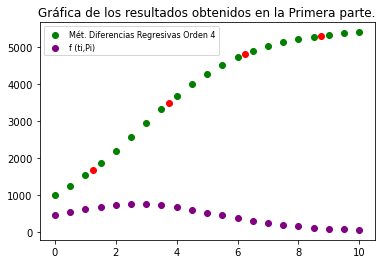

In [73]:
# Ploteo de los puntos obtenidos por el método de las diferencias regresivas, junto con f(ti,Pi) para ese valor:

for i in range(nDiferenciasRegresivasO4+1):
    plt.scatter(tDiferenciasRegresivasO4[i], resultadosDiferenciasRegresivasOrden4[i], s = None, c = "green")
    plt.scatter(tDiferenciasRegresivasO4[i], resultadosDerivadaDiferenciasRegresivasO4[i], s = None, c = "Purple")

# Ploteo de los puntos obtenidos por Hermite:

for i in range(len(tHermite)):
    plt.scatter(tHermite[i], resultadosHermite[i], s = None, c = "red")
    
plt.title("Gráfica de los resultados obtenidos en la Primera parte.")
plt.legend(["Mét. Diferencias Regresivas Orden 4", "f (ti,Pi)"], fontsize = 8, loc = 2)

### En el gráfico se puede observar que los puntos obtenidos mediante la interpolación parecer acomodarse satisfactoriamente al espacio entre las aproximaciones obtenidas en el mét. de Diferencias Regresivas. Es decir, que respetan el ser valores que se encuentran entre una aproximación Pi y la siguiente. 

In [74]:
#-------------------------------------------------------------------------------------------------------------------------#

# <u>Segunda Parte:<u>

## Método de Euler Explícito:
### Debido a que es un método de paso simple de convergencia lineal O(h^1) no necesito valores semilla además del valor inicial (Osea P0).

### El método de Euler Implícito es un método de Taylor. La etiqueta "de taylor" refiere a que proviene de aproximar por dicho método en un entorno de [t, t+h] y truncar en el término que contiene a la primera derivada (osea f(t,P), el segundo término de la aproximación). Los métodos de Euler al tener convergencia lineal suelen ser poco utilizados en contextos de precisión, funcionan más como herramientas de aprendizaje (Al menos en el estudio de los mét. para resolución de EDOs). 

In [75]:
def eulerExplicito_array(a, b, n, f, w0):
    w = []
    w.append(w0)
    h = (b - a) / n
    t0 = a
    w1 = w0 + h*f(t0,w0)
    w.append(w1)
    wActual = w1
    tActual = t0 + h
    for i in range(1, n):
        wAnterior = wActual
        tAnterior = tActual
        wActual = wAnterior + h* f(tAnterior, wAnterior)
        tActual = tAnterior + h
        w.append(wActual)
    return w

In [76]:
#-------------------------------------------------------------------------------------------------------------------------#

In [77]:
tEulerExplicito = np.linspace(a, b, nEulerExplicito+1)
resultadosEulerExplicito = eulerExplicito_array(a, b, nEulerExplicito, f, p0)

In [89]:
pd.DataFrame({"Valores de t" : tEulerExplicito, "Aproximaciones de P obtenidas mediante el mét. de Euler Explícito" : resultadosEulerExplicito})

,Valores de t,Aproximaciones de P obtenidas mediante el mét. de Euler Explícito
0,0.000,1000.000000
1,0.125,1056.250000
2,0.250,1114.921387
3,0.375,1176.034111
4,0.500,1239.598253
...,...,...
76,9.500,5378.157305
77,9.625,5386.348420
78,9.750,5394.000507
79,9.875,5401.147524


In [79]:
#-------------------------------------------------------------------------------------------------------------------------#

In [80]:
# Genero un array que contenga a los valores de f(ti,Pi) para las aprximaciones de P obtenidas con Euler Explícito:

resultadosDerivadaEulerExplicito = []
for i in range(nEulerExplicito+1):
    resultadosDerivadaEulerExplicito.append(f(tEulerExplicito[i], resultadosEulerExplicito[i]))

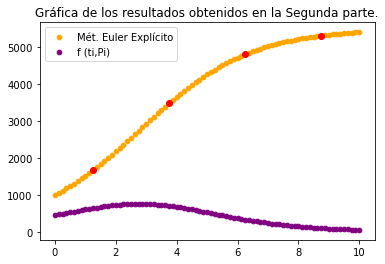

In [96]:
# Ploteo de los puntos obtenidos por el método de Euler Explícito, junto con f(ti,Pi) para ese valor:

for i in range(nEulerExplicito+1):
    plt.scatter(tEulerExplicito[i], resultadosEulerExplicito[i], s = 22, c = "orange")
    plt.scatter(tEulerExplicito[i], resultadosDerivadaEulerExplicito[i], s = 22, c = "purple")

# Ploteo de los puntos obtenidos por Hermite (En la primera parte):

for i in range(len(tHermite)):
    plt.scatter(tHermite[i], resultadosHermite[i], s = None, c = "red")
    
plt.title("Gráfica de los resultados obtenidos en la Segunda parte.")
plt.legend(["Mét. Euler Explícito", "f (ti,Pi)"], fontsize = 10, loc = 2)

In [82]:
#-------------------------------------------------------------------------------------------------------------------------#

## Comparación de aproximaciones:
### Una vez terminados ambos procesos, con el fin de comparar los resultados de ambos métodos, procedo a almacenar los valores obtenidos en la segunda parte que correspondan a los pares ti , Pi que haya interpolado en la primera parte.

In [83]:
resultadosComparativosEulerExplicito = []
for i in range(len(tHermite)): # Sabiendo que el valor de i (contador de iteración) se puede obtener como: 
    indexAux = int(tHermite[i]/hEulerExplicito) # t / h = N° de iteración , lo cual es igual al index de la lista
    resultadosComparativosEulerExplicito.append(resultadosEulerExplicito[indexAux]) # Agrego el valor que corresponde

In [84]:
pd.DataFrame({"Valores de t interpolados" : tHermite, "Resultados mediante interpolación segmentada de Hermite" : resultadosHermite, "Resultados mediante el mét. de Euler Explícito" : resultadosComparativosEulerExplicito})

,Valores de t interpolados,Resultados mediante interpolación segmentada de Hermite,Resultados mediante el mét. de Euler Explícito
0,1.25,1685.700080,1671.556991
1,3.75,3499.302044,3478.579509
2,6.25,4805.436613,4811.143277
3,8.75,5305.813337,5315.524283


In [85]:
#-------------------------------------------------------------------------------------------------------------------------#

# Conclusiones finales:

### Una vez finalizados los apartados del trabajo individual, la opinión que forme fue la siguiente; Si bien no dispongo de los resultados exactos de la función P(t) en los diferentes ti que interpole luego de utilizar el método de las Diferencias Regresivas, y que posteriormente compare con el método de Euler Explícito, es seguro estimar que los resultados que más se acerquen a la verdadera naturaleza de P(t) sean los que devolvió Hermite Segmentado. Esto fundamentado sobre el hecho de que ambos métodos empleados son de orden 4, mientras que el método de Euler Explícito es de orden 1. Las diferencias entre los resultados de ambos apartados no son abismales, dependiendo del contexto hasta incluso podrían ser útiles ambas, pero también cabe destacar que se necesitaron 60 iteraciones más del método de Euler Explícito para lograr dichos resultados. No obstante también es cierto que se necesito interpolar sobre los valores de Diferencias Regresivas (Orden 4) para poder obtener los valores de t pedidos.

### En resumen, que metodología de trabajo fue la más adecuada dependerá de que tipo de datos se quieran obtener, en que contexto se necesiten y cual es la precisión requerida. Aunque personalmente optaría por trabajar con la metodología de Diferencias Regresivas Orden 4 + Hermite Segmentado, ya que al menos según la teoría debería representar mejor la situación real a analizar.

In [ ]:
#-------------------------------------------------------------------------------------------------------------------------#